In [44]:
import numpy as np

In [45]:
import pandas as pd

In [46]:
np.random.seed(42)

In [47]:
apartments=[f"Apt_{i}" for i in range(1,21)]

In [48]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [49]:
date=pd.DataFrame({
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
})

In [50]:
df = pd.DataFrame(date)

In [51]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_1,22.483571
1,2025-07-02,Apt_1,19.308678
2,2025-07-03,Apt_1,23.238443
3,2025-07-04,Apt_1,27.615149
4,2025-07-05,Apt_1,18.829233
...,...,...,...
595,2025-07-26,Apt_20,17.449918
596,2025-07-27,Apt_20,18.650625
597,2025-07-28,Apt_20,15.106181
598,2025-07-29,Apt_20,17.778534


In [52]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_1,22.483571
1,2025-07-02,Apt_1,19.308678
2,2025-07-03,Apt_1,23.238443
3,2025-07-04,Apt_1,27.615149
4,2025-07-05,Apt_1,18.829233
...,...,...,...
595,2025-07-26,Apt_20,17.449918
596,2025-07-27,Apt_20,18.650625
597,2025-07-28,Apt_20,15.106181
598,2025-07-29,Apt_20,17.778534


In [53]:
print(df.isnull().sum())

Date                 0
Apartment            0
Electricity_usage    0
dtype: int64


In [54]:
print(df.describe())

                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          19.932404
min    2025-07-01 00:00:00           3.793663
25%    2025-07-08 00:00:00          16.526932
50%    2025-07-15 12:00:00          20.038692
75%    2025-07-23 00:00:00          23.115837
max    2025-07-30 00:00:00          39.263657
std                    NaN           4.860957


In [55]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [56]:
#Total usage per apartments
usage_per_apartment = df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending = False)
print(usage_per_apartment)

Apartment
Apt_11    642.282391
Apt_6     641.817993
Apt_13    634.225898
Apt_10    616.074819
Apt_20    613.164300
Apt_7     609.838848
Apt_8     607.205434
Apt_16    606.985293
Apt_14    604.314773
Apt_3     601.932716
Apt_4     596.962256
Apt_15    591.394231
Apt_19    586.585246
Apt_5     585.756283
Apt_2     581.825629
Apt_9     578.485218
Apt_1     571.777966
Apt_17    570.315585
Apt_12    569.016727
Apt_18    549.480581
Name: Electricity_usage, dtype: float64


In [57]:
daily_avg = df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg)

Date
2025-07-01    21.043539
2025-07-02    20.870132
2025-07-03    19.567646
2025-07-04    20.985517
2025-07-05    19.782940
2025-07-06    19.378790
2025-07-07    20.217539
2025-07-08    19.257432
2025-07-09    20.026877
2025-07-10    19.378639
2025-07-11    18.583965
2025-07-12    20.734315
2025-07-13    21.806385
2025-07-14    19.903964
2025-07-15    19.895329
2025-07-16    19.869134
2025-07-17    19.625928
2025-07-18    19.513570
2025-07-19    20.177895
2025-07-20    16.908401
2025-07-21    19.949131
2025-07-22    20.073323
2025-07-23    17.306597
2025-07-24    21.301705
2025-07-25    20.179495
2025-07-26    19.113602
2025-07-27    19.725822
2025-07-28    19.391965
2025-07-29    21.302088
2025-07-30    22.100444
Name: Electricity_usage, dtype: float64


In [58]:
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())

Date
2025-07-01    21.043539
2025-07-02    20.870132
2025-07-03    19.567646
2025-07-04    20.985517
2025-07-05    19.782940
Name: Electricity_usage, dtype: float64


In [59]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

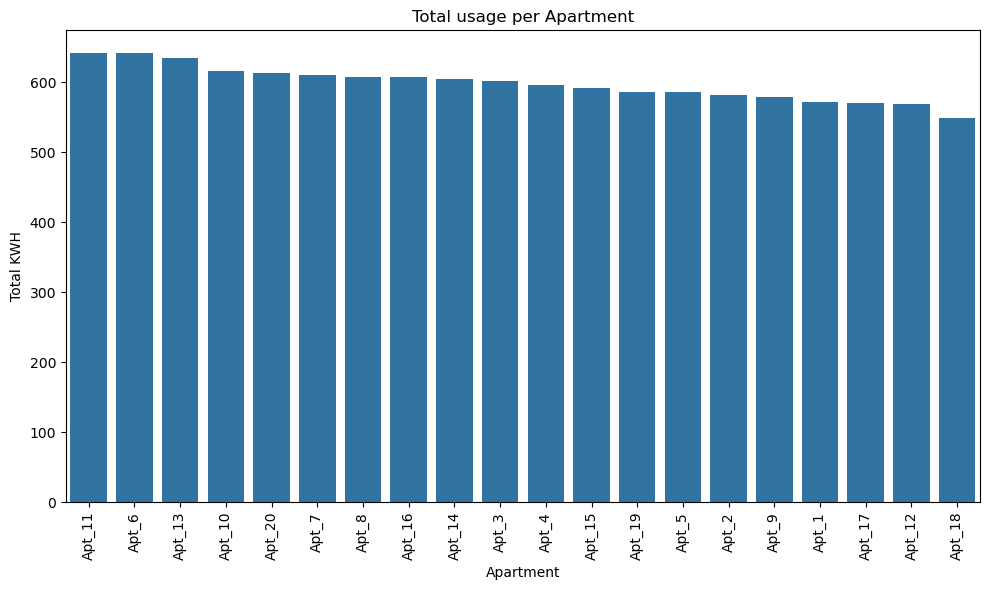

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y=usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartment")
plt.xlabel("Apartment")
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()

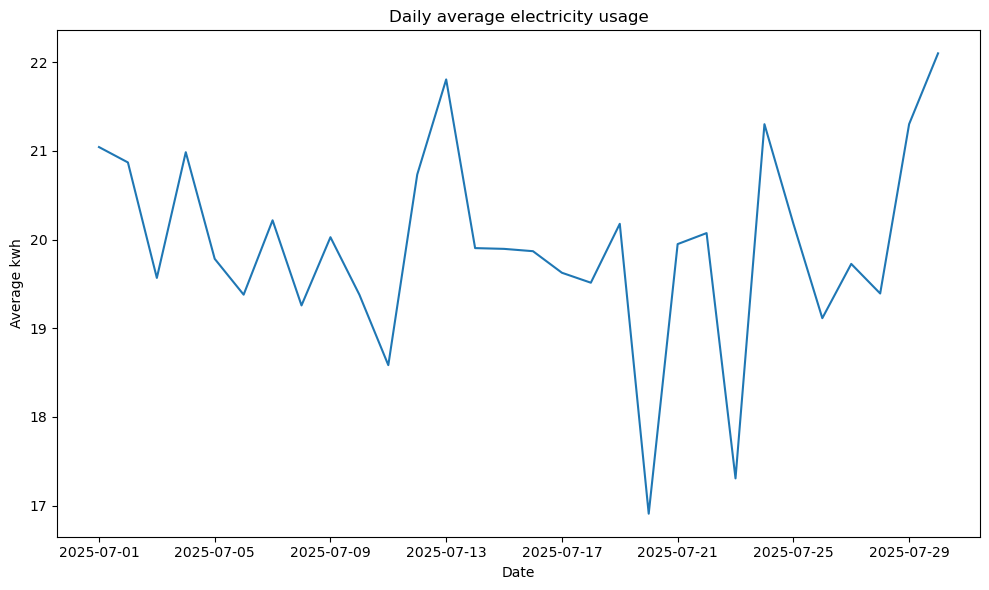

In [62]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index,y=daily_avg.values)
plt.title("Daily average electricity usage")
plt.xlabel("Date")
plt.ylabel("Average kwh")
plt.tight_layout()
plt.show()

In [63]:
threshold= df["Electricity_usage"].mean()+2 *df["Electricity_usage"].std()
df["High_Usage_flag"]=df["Electricity_usage"] > threshold
print(df[df["High_Usage_flag"]==True].head())

          Date Apartment  Electricity_usage  High_Usage_flag
113 2025-07-24     Apt_4          32.316211             True
125 2025-07-06     Apt_5          30.952278             True
179 2025-07-30     Apt_6          33.600846             True
209 2025-07-30     Apt_7          39.263657             True
220 2025-07-11     Apt_8          31.573293             True
